In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('dd.csv')
df.head()

,ItemId,WeekNoinTotal,YearID,MonthID,MonthNoinTotal,WeekID,WeekNoinMonth,QTY,SALESAVE,on_promo,Display_EndCap,on_display,Page_Number
0,727400,1,2014,Jan,1,W001,1,25,0.0,0,0,0,0
1,727400,2,2014,Jan,1,W002,2,749,0.0,0,0,0,0
2,727400,3,2014,Jan,1,W003,3,958,0.0,0,0,0,0
3,727400,4,2014,Jan,1,W004,4,955,0.0,0,0,0,0
4,727400,5,2014,Feb,2,W005,1,927,0.0,0,0,0,0


In [3]:
df1=df[df.ItemId==972142]
df1.head()

,ItemId,WeekNoinTotal,YearID,MonthID,MonthNoinTotal,WeekID,WeekNoinMonth,QTY,SALESAVE,on_promo,Display_EndCap,on_display,Page_Number
590,972142,1,2014,Jan,1,W001,1,4,0.0,0,0,0,0
591,972142,2,2014,Jan,1,W002,2,35,0.0,0,0,0,0
592,972142,3,2014,Jan,1,W003,3,46,0.0,0,0,0,0
593,972142,4,2014,Jan,1,W004,4,39,0.0,0,0,0,0
594,972142,5,2014,Feb,2,W005,1,31,0.0,0,0,0,0


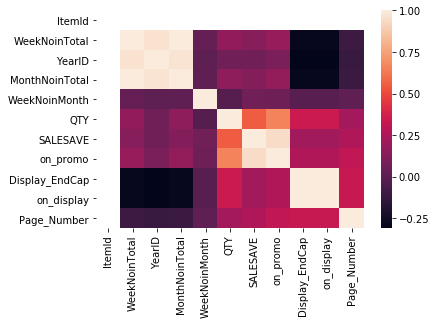

In [22]:
import seaborn as sns
corr = df1.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [24]:
df1.corr()

,ItemId,WeekNoinTotal,YearID,MonthNoinTotal,WeekNoinMonth,QTY,SALESAVE,on_promo,Display_EndCap,on_display,Page_Number
ItemId,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WeekNoinTotal,NaN,1.000000,0.966294,0.999616,0.035735,0.169496,0.134221,0.181698,-0.284457,-0.284457,-0.104376
YearID,NaN,0.966294,1.000000,0.969411,0.011141,0.069616,0.068794,0.095721,-0.309615,-0.309615,-0.112083
MonthNoinTotal,NaN,0.999616,0.969411,1.000000,0.015301,0.160675,0.128368,0.174664,-0.287377,-0.287377,-0.108676
WeekNoinMonth,NaN,0.035735,0.011141,0.015301,1.000000,-0.013320,0.066317,0.057905,-0.002826,-0.002826,0.016682
QTY,NaN,0.169496,0.069616,0.160675,-0.013320,1.000000,0.552602,0.659007,0.343846,0.343846,0.227512
SALESAVE,NaN,0.134221,0.068794,0.128368,0.066317,0.552602,1.000000,0.947061,0.216265,0.216265,0.258071
on_promo,NaN,0.181698,0.095721,0.174664,0.057905,0.659007,0.947061,1.000000,0.260454,0.260454,0.310802
Display_EndCap,NaN,-0.284457,-0.309615,-0.287377,-0.002826,0.343846,0.216265,0.260454,1.000000,1.000000,0.330111
on_display,NaN,-0.284457,-0.309615,-0.287377,-0.002826,0.343846,0.216265,0.260454,1.000000,1.000000,0.330111


In [4]:
notpromo=df1[df1['on_promo']==0]['QTY']
promo=df1[df1['on_promo']==1]['QTY']

In [5]:
print("Not on promo QTY mean:", notpromo.mean())
print("On promo QTY mean:",promo.mean())

Not on promo QTY mean: 69.20370370370371
On promo QTY mean: 165.95804195804195


In [6]:
#H0 = Products not on promo are sold more or equal to products on promo
#H1 = Products not on promo are sold less than products on promo

In [7]:
stat, pval = stats.ttest_ind(promo, notpromo, equal_var=False)

In [8]:
pval/2

5.698037732991534e-22

In [9]:
alpha = 0.05

In [10]:
if pval/2 < alpha:
    print("H1 is true, H0 is rejected")
if pval/2 >= alpha:
    print("H0 is accepted and H1 is rejected")

H1 is true, H0 is rejected


In [11]:
notdisp=df1[df1['on_display']==0]['QTY']
disp=df1[df1['on_display']==1]['QTY']

In [12]:
print("Not on display QTY mean:", notdisp.mean())
print("On display QTY mean:",disp.mean())

Not on display QTY mean: 129.89221556886227
On display QTY mean: 192.56666666666666


In [13]:
stat, pval = stats.ttest_ind(disp, notdisp, equal_var=False)

In [14]:
pval/2

2.958731158684734e-14

In [15]:
if pval/2 < alpha:
    print("H1 is true, H0 is rejected")
if pval/2 >= alpha:
    print("H0 is accepted and H1 is rejected")

H1 is true, H0 is rejected


In [16]:
not_sale=df1[df1['SALESAVE']==0]['QTY']
on_sale=df1[df1['SALESAVE']!=1]['QTY']

In [17]:
print("Not on sale QTY mean:", not_sale.mean())
print("On sale QTY mean:",on_sale.mean())

Not on sale QTY mean: 69.20370370370371
On sale QTY mean: 139.43654822335026


In [18]:
stat, pval = stats.ttest_ind(on_sale, not_sale, equal_var=False)

In [19]:
pval/2

2.0974140179017067e-14

In [20]:
if pval/2 < alpha:
    print("H1 is true, H0 is rejected")
if pval/2 >= alpha:
    print("H0 is accepted and H1 is rejected")

H1 is true, H0 is rejected
